In [1]:
cd /content/drive/My Drive/Dava with ML

/content/drive/My Drive/Dava with ML


In [2]:
!unzip parkinson_dataset.zip

Archive:  parkinson_dataset.zip
  inflating: pd_speech_features.csv  


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as m

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
ls

breast-cancer-wisconsin-data.zip  hepatiits_dataset.zip
Cancer.ipynb                      indian_liver_patient.csv
cardiovaskular_dataset.zip        indian-liver-patient-records.zip
chronic-kidney-disease.zip        kidney.ipynb
data.csv                          liver.ipynb
Dataset_spine.csv                 new_model.csv
diabetes.csv                      parkinson_dataset.zip
Diabeties.ipynb                   Parkinson.ipynb
heart.csv                         pd_speech_features.csv
heart-disease-uci.zip             pima-indians-diabetes-database.zip
heart.ipynb                       Spine.ipynb


In [4]:
dataset=pd.read_csv('pd_speech_features.csv')
dataset

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,...,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,0.00067,0.00129,0.00200,0.05883,0.517,0.03011,0.03496,0.04828,0.09034,0.970805,0.036223,18.995,69.997496,76.088046,72.465512,539.342735,1031.849040,2447.162183,3655.054806,101.092218,83.147440,255.214830,396.643631,0.77778,11.7245,2.8277,1.17300,0.265120,0.083127,...,0.071728,0.010352,-2.730300,66.5007,36.9934,26.3508,51.9577,21.5451,8.2488,8.0024,6.9635,6.9189,5.0622,4.6068,7.7218,2.7224,2.4171,2.9383,4.2077,3.1541,2.8531,2.7496,2.1550,2.9457,2.1993,1.9830,1.8314,2.0062,1.6058,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,0.00052,0.00112,0.00157,0.05516,0.502,0.02320,0.03675,0.06195,0.06961,0.984322,0.017974,21.497,67.415903,73.046374,71.528945,564.363614,1016.367294,2383.565201,3498.681572,58.465428,86.487292,248.357127,218.229722,0.81250,13.8284,2.8908,1.02210,0.220040,0.127410,...,0.729330,0.780410,5.229400,8643.9860,3962.0554,2976.2411,4329.0607,4005.1329,1127.6762,116.5331,20.2332,13.6395,12.5514,13.6965,60.8974,6.2958,3.0323,3.4039,4.3794,2.4329,2.0585,2.1839,2.2061,3.0999,1.9824,1.6227,1.5783,2.0470,1.5772,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,0.00057,0.00111,0.00171,0.09902,0.897,0.05094,0.06497,0.07772,0.15282,0.974846,0.026313,17.651,62.661706,71.633549,68.086583,548.444604,1032.406341,2357.826954,3678.128717,160.387771,54.685168,151.694847,84.240339,0.81818,26.9273,2.6975,0.84951,0.157560,0.116890,...,0.269510,-0.005522,0.350540,29.2717,32.4971,38.9453,85.1480,62.5132,9.7308,6.8890,6.1357,5.4926,3.9078,4.0864,6.9828,3.4411,3.5173,3.7204,4.2212,3.4881,3.4851,3.3007,2.0427,3.1436,2.1203,1.6627,1.6731,3.2597,1.5921,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,0.00149,0.00268,0.00446,0.05451,0.527,0.02395,0.02857,0.04462,0.07185,0.968343,0.042003,19.865,76.306989,81.000749,79.190593,819.529588,1201.813897,3154.035654,4122.163933,238.667052,191.984916,573.752909,526.147599,0.98548,139.5744,1.6961,0.83405,0.172950,0.147370,...,0.366920,-0.492650,0.191640,591.0116,65.3827,53.9852,45.4458,34.6650,88.3259,46.6869,23.2911,19.2022,42.3957,100.3649,7.1967,6.3892,6.5496,6.0264,4.7656,4.8909,4.2531,3.0295,2.0362,1.8478,2.5776,2.2064,1.9491,1.9120,1.8829,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4

In [5]:
dataset.drop(['id'],axis=1)

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,GNE_SNR_SEO,...,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,0.00067,0.00129,0.00200,0.05883,0.517,0.03011,0.03496,0.04828,0.09034,0.970805,0.036223,18.995,69.997496,76.088046,72.465512,539.342735,1031.849040,2447.162183,3655.054806,101.092218,83.147440,255.214830,396.643631,0.77778,11.7245,2.8277,1.17300,0.265120,0.083127,1200445.612,...,0.071728,0.010352,-2.730300,66.5007,36.9934,26.3508,51.9577,21.5451,8.2488,8.0024,6.9635,6.9189,5.0622,4.6068,7.7218,2.7224,2.4171,2.9383,4.2077,3.1541,2.8531,2.7496,2.1550,2.9457,2.1993,1.9830,1.8314,2.0062,1.6058,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,0.00052,0.00112,0.00157,0.05516,0.502,0.02320,0.03675,0.06195,0.06961,0.984322,0.017974,21.497,67.415903,73.046374,71.528945,564.363614,1016.367294,2383.565201,3498.681572,58.465428,86.487292,248.357127,218.229722,0.81250,13.8284,2.8908,1.02210,0.220040,0.127410,1298455.445,...,0.729330,0.780410,5.229400,8643.9860,3962.0554,2976.2411,4329.0607,4005.1329,1127.6762,116.5331,20.2332,13.6395,12.5514,13.6965,60.8974,6.2958,3.0323,3.4039,4.3794,2.4329,2.0585,2.1839,2.2061,3.0999,1.9824,1.6227,1.5783,2.0470,1.5772,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,0.00057,0.00111,0.00171,0.09902,0.897,0.05094,0.06497,0.07772,0.15282,0.974846,0.026313,17.651,62.661706,71.633549,68.086583,548.444604,1032.406341,2357.826954,3678.128717,160.387771,54.685168,151.694847,84.240339,0.81818,26.9273,2.6975,0.84951,0.157560,0.116890,1272869.841,...,0.269510,-0.005522,0.350540,29.2717,32.4971,38.9453,85.1480,62.5132,9.7308,6.8890,6.1357,5.4926,3.9078,4.0864,6.9828,3.4411,3.5173,3.7204,4.2212,3.4881,3.4851,3.3007,2.0427,3.1436,2.1203,1.6627,1.6731,3.2597,1.5921,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,0.00149,0.00268,0.00446,0.05451,0.527,0.02395,0.02857,0.04462,0.07185,0.968343,0.042003,19.865,76.306989,81.000749,79.190593,819.529588,1201.813897,3154.035654,4122.163933,238.667052,191.984916,573.752909,526.147599,0.98548,139.5744,1.6961,0.83405,0.172950,0.147370,1932289.206,...,0.366920,-0.492650,0.191640,591.0116,65.3827,53.9852,45.4458,34.6650,88.3259,46.6869,23.2911,19.2022,42.3957,100.3649,7.1967,6.3892,6.5496,6.0264,4.7656,4.8909,4.2531,3.0295,2.0362,1.8478,2.5776,2.2064,1.9491,1.9120,1.8829,6.9761,3.7805,3.5664,5.25

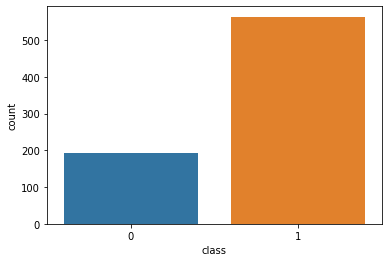

In [6]:
sns.countplot(x='class',data=dataset)

In [7]:
dataset['class'].unique()

array([1, 0])

In [0]:
dataset=dataset.drop('id',axis=1)

In [11]:
dataset.corr()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,GNE_SNR_SEO,...,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
gender,1.000000,0.010175,0.099356,0.168321,-0.478367,-0.477710,0.460422,-0.110587,0.112004,0.147604,0.103713,0.132220,0.103607,0.049110,0.045108,0.042358,0.021262,0.070699,0.042361,-0.052420,0.049660,-0.102439,-0.036851,0.020527,0.015253,-0.519415,-0.487495,0.097458,-0.069628,-0.162028,-0.147007,-0.181002,0.047676,-0.096363,0.067785,0.007415,-0.185652,0.058348,-0.130788,-0.242062,...,-0.004349,0.000188,-0.017461,0.087143,0.060780,0.052639,0.039608,0.030366,0.002321,-0.059287,-0.000746,0.003781,-0.046313,-0.032178,0.079000,0.037589,-0.053820,-0.028764,0.073180,0.009664,0.020030,0.007581,0.150320,0.029382,-0.065918,-0.040040,-0.040027,-0.055503,-0.240361,-0.273543,-0.098689,0.000210,0.066091,0.083499,0.089793,0.107618,0.128936,0.107734,0.104828,0.182713
PPE,0.010175,1.000000,-0.094775,-0.405558,0.191535,0.194098,-0.201907,-0.423660,-0.349053,-0.331009,-0.352693,-0.315749,-0.352547,-0.291379,-0.304997,-0.277071,-0.265907,-0.221549,-0.277074,0.343101,-0.322490,0.356035,0.198188,0.086053,0.112837,0.027940,0.009153,-0.021486,-0.004957,-0.052845,0.028994,0.008813,0.035277,0.276340,-0.313848,-0.385027,0.124969,-0.026172,0.027658,-0.023071,...,0.007413,0.012388,0.011800,-0.007339,-0.009811,-0.018240,-0.021187,-0.025908,-0.006875,0.016458,0.026299,0.028712,0.020360,-0.000354,0.013429,-0.004995,-0.050024,-0.067350,-0.089904,-0.106519,-0.069824,-0.056492,-0.031845,-0.026025,-0.129244,-0.054152,-0.038443,0.009439,0.087448,0.112430,0.144261,0.135544,0.091726,0.065035,0.044163,0.045755,0.046175,0.037385,0.039588,-0.072939
DFA,0.099356,-0.094775,1.000000,0.155075,-0.286791,-0.286611,0.253708,0.084655,0.212120,0.201248,0.215512,0.229371,0.215378,0.285156,0.294626,0.301879,0.275767,0.208066,0.301883,-0.167906,0.142591,-0.301407,-0.289473,-0.304389,-0.310986,-0.534511,-0.077814,0.127907,0.158442,0.253536,0.057464,-0.168004,0.020668,-0.191824,0.235595,0.237366,-0.199837,0.059547,0.007580,-0.145671,...,0.019978,0.023473,-0.004075,0.042498,0.100679,0.104691,0.109488,0.109294,0.122634,0.120202,0.097072,0.085883,0.056684,0.072051,0.106266,0.173179,0.123133,0.171375,0.286023,0.294587,0.271449,0.228166,0.183769,0.095564,0.133858,-0.023476,-0.085934,-0.173878,-0.247077,-0.199388,-0.146325,-0.104456,-0.061129,-0.063451,-0.061845,-0.033914,0.043454,0.067843,0.116699,0.306070
RPDE,0.168321,-0.405558,0.155075,1.000000,-0.521193,-0.524839,0.506707,0.333545,0.614340,0.608966,0.577108,0.589089,0.577045,0.610379,0.616448,0.563453,0.584540,0.607861,0.563454,-0.634419,0.589037,-0.754855,-0.371692,-0.256089,-0.315395,-0.152030,-0.0

In [12]:
dataset.columns

Index(['gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       'locAbsJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=754)

In [0]:
dataset=dataset.drop('perimeter_mean',axis=1).drop('area_mean',axis=1).drop('compactness_mean',axis=1).drop('concave points_mean',axis=1).drop('perimeter_se',axis=1).drop('area_se',axis=1).drop('compactness_se',axis=1).drop('concave points_se',axis=1)

In [0]:
dataset=dataset.drop('perimeter_worst',axis=1).drop('area_worst',axis=1).drop('compactness_worst',axis=1).drop('concave points_worst',axis=1)

In [0]:
dataset

,diagnosis,radius_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.30010,0.2419,0.07871,1.0950,0.9053,0.006399,0.05373,0.03003,0.006193,25.380,17.33,0.16220,0.7119,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.08690,0.1812,0.05667,0.5435,0.7339,0.005225,0.01860,0.01389,0.003532,24.990,23.41,0.12380,0.2416,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.19740,0.2069,0.05999,0.7456,0.7869,0.006150,0.03832,0.02250,0.004571,23.570,25.53,0.14440,0.4504,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.24140,0.2597,0.09744,0.4956,1.1560,0.009110,0.05661,0.05963,0.009208,14.910,26.50,0.20980,0.6869,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.19800,0.1809,0.05883,0.7572,0.7813,0.011490,0.05688,0.01756,0.005115,22.540,16.67,0.13740,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,0.11100,0.24390,0.1726,0.05623,1.1760,1.2560,0.010300,0.05198,0.01114,0.004239,25.450,26.40,0.14100,0.4107,0.2060,0.07115
565,1,20.13,28.25,0.09780,0.14400,0.1752,0.05533,0.7655,2.4630,0.005769,0.03950,0.01898,0.002498,23.690,38.25,0.11660,0.3215,0.2572,0.06637
566,1,16.60,28.08,0.08455,0.09251,0.1590,0.05648,0.4564,1.0750,0.005903,0.04730,0.01318,0.003892,18.980,34.12,0.11390,0.3403,0.2218,0.07820
567,1,20.60,29.33,0.11780,0.35140,0.2397,0.07016,0.7260,1.5950,0.006522,0.07117,0.02324,0.006185,25.740,39.42,0.16500,0.9387,0.4087,0.12400


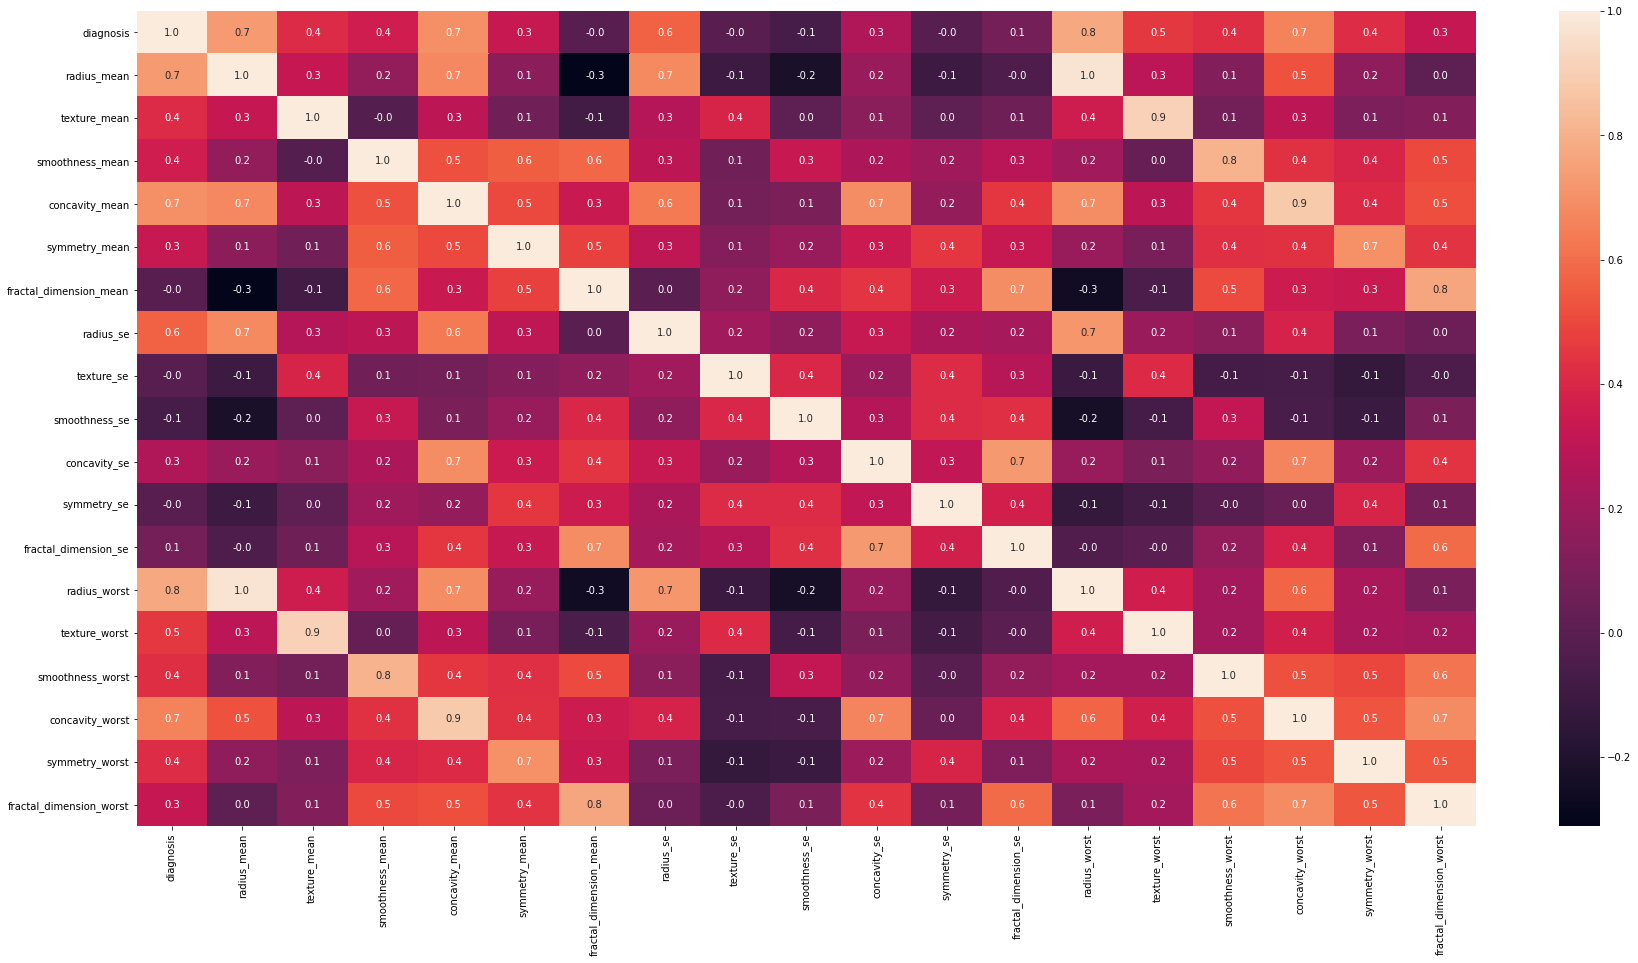

In [0]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True,fmt='.1f')
plt.show()

In [0]:
dataset=dataset.drop('texture_worst',axis=1)

In [0]:
dataset=dataset.drop('texture_mean',axis=1)

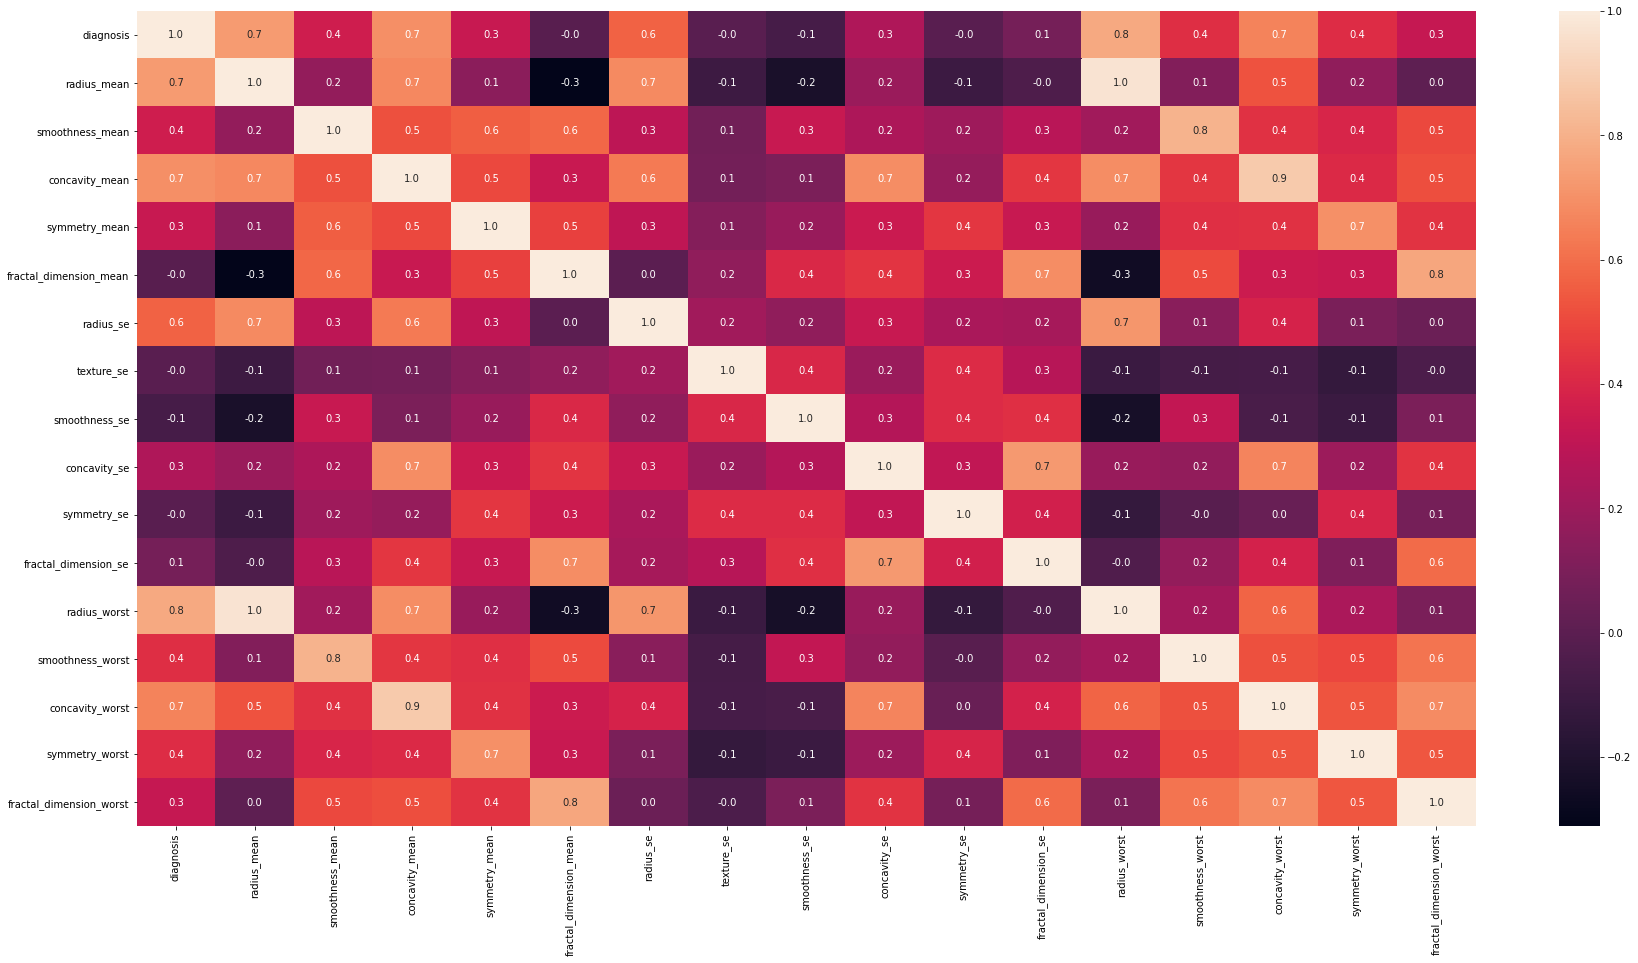

In [0]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True,fmt='.1f')
plt.show()

In [0]:
dataset=dataset.drop('concavity_worst',axis=1)

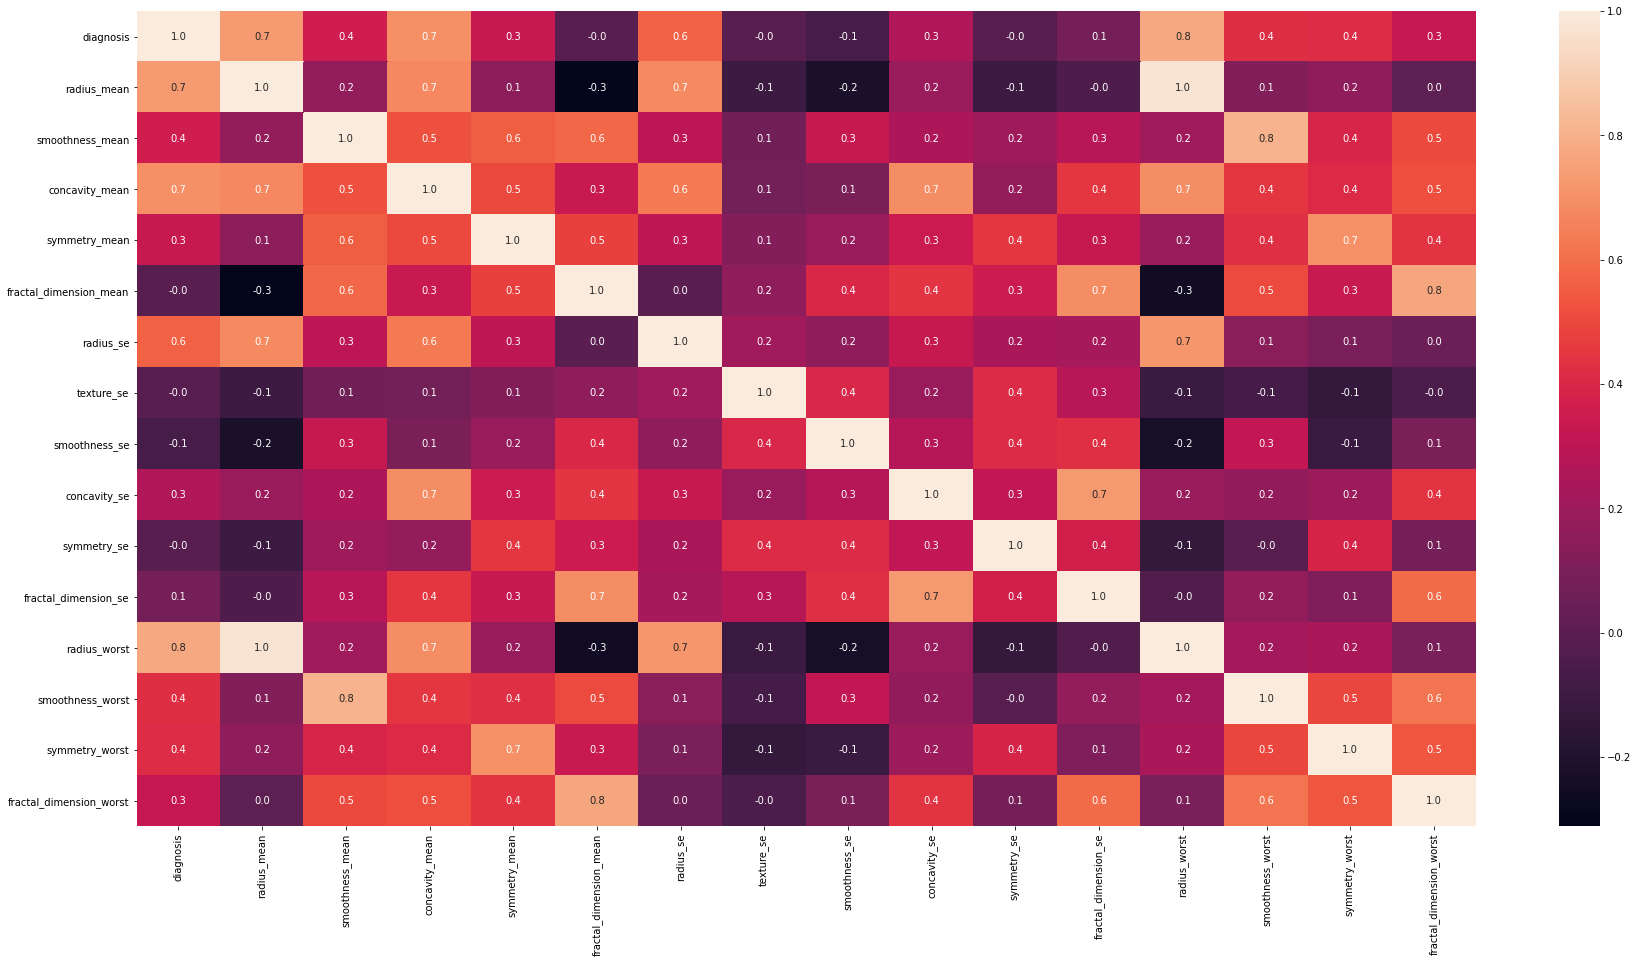

In [0]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True,fmt='.1f')
plt.show()

In [0]:
dataset

,diagnosis,radius_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,radius_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,0.11840,0.30010,0.2419,0.07871,1.0950,0.9053,0.006399,0.05373,0.03003,0.006193,25.380,0.16220,0.4601,0.11890
1,1,20.57,0.08474,0.08690,0.1812,0.05667,0.5435,0.7339,0.005225,0.01860,0.01389,0.003532,24.990,0.12380,0.2750,0.08902
2,1,19.69,0.10960,0.19740,0.2069,0.05999,0.7456,0.7869,0.006150,0.03832,0.02250,0.004571,23.570,0.14440,0.3613,0.08758
3,1,11.42,0.14250,0.24140,0.2597,0.09744,0.4956,1.1560,0.009110,0.05661,0.05963,0.009208,14.910,0.20980,0.6638,0.17300
4,1,20.29,0.10030,0.19800,0.1809,0.05883,0.7572,0.7813,0.011490,0.05688,0.01756,0.005115,22.540,0.13740,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,0.11100,0.24390,0.1726,0.05623,1.1760,1.2560,0.010300,0.05198,0.01114,0.004239,25.450,0.14100,0.2060,0.07115
565,1,20.13,0.09780,0.14400,0.1752,0.05533,0.7655,2.4630,0.005769,0.03950,0.01898,0.002498,23.690,0.11660,0.2572,0.06637
566,1,16.60,0.08455,0.09251,0.1590,0.05648,0.4564,1.0750,0.005903,0.04730,0.01318,0.003892,18.980,0.11390,0.2218,0.07820
567,1,20.60,0.11780,0.35140,0.2397,0.07016,0.7260,1.5950,0.006522,0.07117,0.02324,0.006185,25.740,0.16500,0.4087,0.12400


In [0]:
dir(le)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 'classes_',
 'fit',
 'fit_transform',
 'get_params',
 'inverse_transform',
 'set_params',
 'transform']

In [0]:
le.classes_

array(['B', 'M'], dtype=object)

In [0]:
features=dataset.iloc[:,1:]

In [0]:
features

,radius_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,radius_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,17.99,0.11840,0.30010,0.2419,0.07871,1.0950,0.9053,0.006399,0.05373,0.03003,0.006193,25.380,0.16220,0.4601,0.11890
1,20.57,0.08474,0.08690,0.1812,0.05667,0.5435,0.7339,0.005225,0.01860,0.01389,0.003532,24.990,0.12380,0.2750,0.08902
2,19.69,0.10960,0.19740,0.2069,0.05999,0.7456,0.7869,0.006150,0.03832,0.02250,0.004571,23.570,0.14440,0.3613,0.08758
3,11.42,0.14250,0.24140,0.2597,0.09744,0.4956,1.1560,0.009110,0.05661,0.05963,0.009208,14.910,0.20980,0.6638,0.17300
4,20.29,0.10030,0.19800,0.1809,0.05883,0.7572,0.7813,0.011490,0.05688,0.01756,0.005115,22.540,0.13740,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,0.11100,0.24390,0.1726,0.05623,1.1760,1.2560,0.010300,0.05198,0.01114,0.004239,25.450,0.14100,0.2060,0.07115
565,20.13,0.09780,0.14400,0.1752,0.05533,0.7655,2.4630,0.005769,0.03950,0.01898,0.002498,23.690,0.11660,0.2572,0.06637
566,16.60,0.08455,0.09251,0.1590,0.05648,0.4564,1.0750,0.005903,0.04730,0.01318,0.003892,18.980,0.11390,0.2218,0.07820
567,20.60,0.11780,0.35140,0.2397,0.07016,0.7260,1.5950,0.006522,0.07117,0.02324,0.006185,25.740,0.16500,0.4087,0.12400


In [0]:
labels=dataset.iloc[:,0]

In [0]:
labels

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [0]:
feature_train,feature_test,label_train,label_test=train_test_split(features,labels,test_size=0.2,random_state=42)

##Logistic Regression

In [0]:
model=LogisticRegression()
model.fit(feature_train,label_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
label_pred=model.predict(feature_test)

In [0]:
m.accuracy_score(label_test,label_pred)

0.9912280701754386

In [0]:
label_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [0]:
label_test

204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int64

In [0]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [0]:
print(m.confusion_matrix(label_test,label_pred))

[[71  0]
 [ 1 42]]


##KNN

In [0]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':list(np.arange(1,20))}


In [0]:
model=GridSearchCV(knn,param_grid=param)
model.fit(feature_train,label_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
model.best_params_

{'n_neighbors': 5}

In [0]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(feature_train,label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
label_pred=model.predict(feature_test)

In [0]:
m.accuracy_score(label_test,label_pred)

0.9649122807017544

In [0]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [0]:
print(m.confusion_matrix(label_test,label_pred))

[[70  1]
 [ 3 40]]


In [0]:
label_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

In [0]:
label_test

204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int64

##Decision Tree

In [0]:
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier()
param={'max_depth':list(np.arange(1,20))}


In [0]:
model=GridSearchCV(dt,param_grid=param)
model.fit(feature_train,label_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1

In [0]:
model.best_params_

{'max_depth': 5}

In [0]:
model=DecisionTreeClassifier(max_depth=5)
model.fit(feature_train,label_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
label_pred=model.predict(feature_test)

In [0]:
m.accuracy_score(label_test,label_pred)

0.9210526315789473

In [0]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        71
           1       0.89      0.91      0.90        43

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



In [0]:
print(m.confusion_matrix(label_test,label_pred))

[[66  5]
 [ 4 39]]


In [0]:
label_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [0]:
label_test

204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int64

##SVM

In [0]:
model=SVC()
model.fit(feature_train,label_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
label_pred=model.predict(feature_test)

In [0]:
m.accuracy_score(label_test,label_pred)

0.9473684210526315

In [0]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [0]:
print(m.confusion_matrix(label_test,label_pred))

In [0]:
label_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [0]:
label_test

204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int64

##RandomForest Classifier

In [0]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
param={'n_estimators':[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200],'max_depth':list(np.arange(1,20))}


In [0]:
model=GridSearchCV(rfc,param_grid=param)
model.fit(feature_train,label_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [0]:
model.best_params_

{'max_depth': 18, 'n_estimators': 40}

In [0]:
model=model.best_estimator_

In [0]:
label_pred=model.predict(feature_test)

In [0]:
m.accuracy_score(label_test,label_pred)

0.9736842105263158

In [0]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [0]:
print(m.confusion_matrix(label_test,label_pred))

[[70  1]
 [ 2 41]]


In [0]:
label_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [0]:
label_test

204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int64